## Collect Dataset

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Unduh dan baca file Excel
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)  # header=1 karena baris ke-2 adalah nama kolom yang benar

In [ ]:
# Hapus kolom 'ID'
df.drop(columns=["ID"], inplace=True)

In [ ]:
# Simpan sebagai CSV
df.to_csv("credit_card_default_clean.csv", index=False)
print("CSV berhasil disimpan.")

CSV berhasil disimpan.


## Exploratory Data Analysis

In [ ]:
# Menampilkan beberapa baris pertama
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
# Menampilkan deskripsi data
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Pastikan 'default payment next month' adalah kolom target, kita ubah namanya jadi 'Y' untuk konsistensi
df.rename(columns={'default payment next month': 'Y'}, inplace=True)

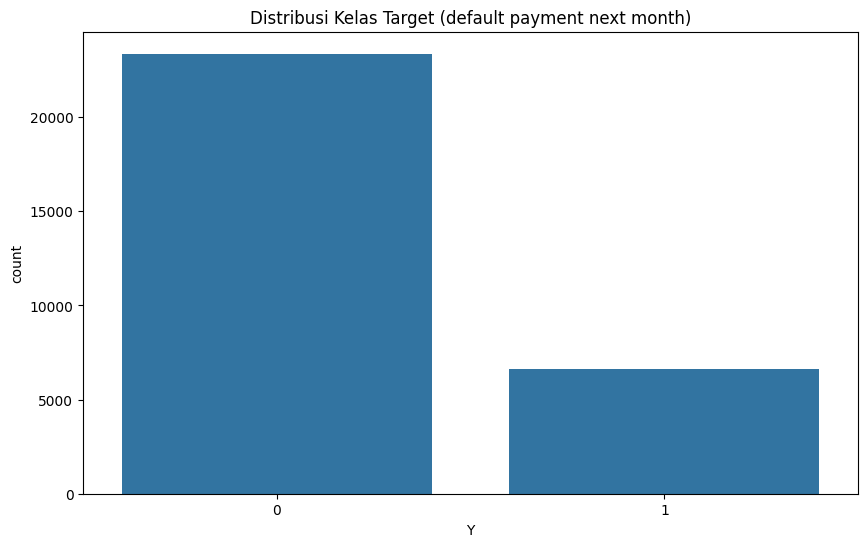

In [ ]:
# Cek distribusi kelas
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Y', order=df['Y'].value_counts().index)
plt.title("Distribusi Kelas Target (default payment next month)")
plt.show()

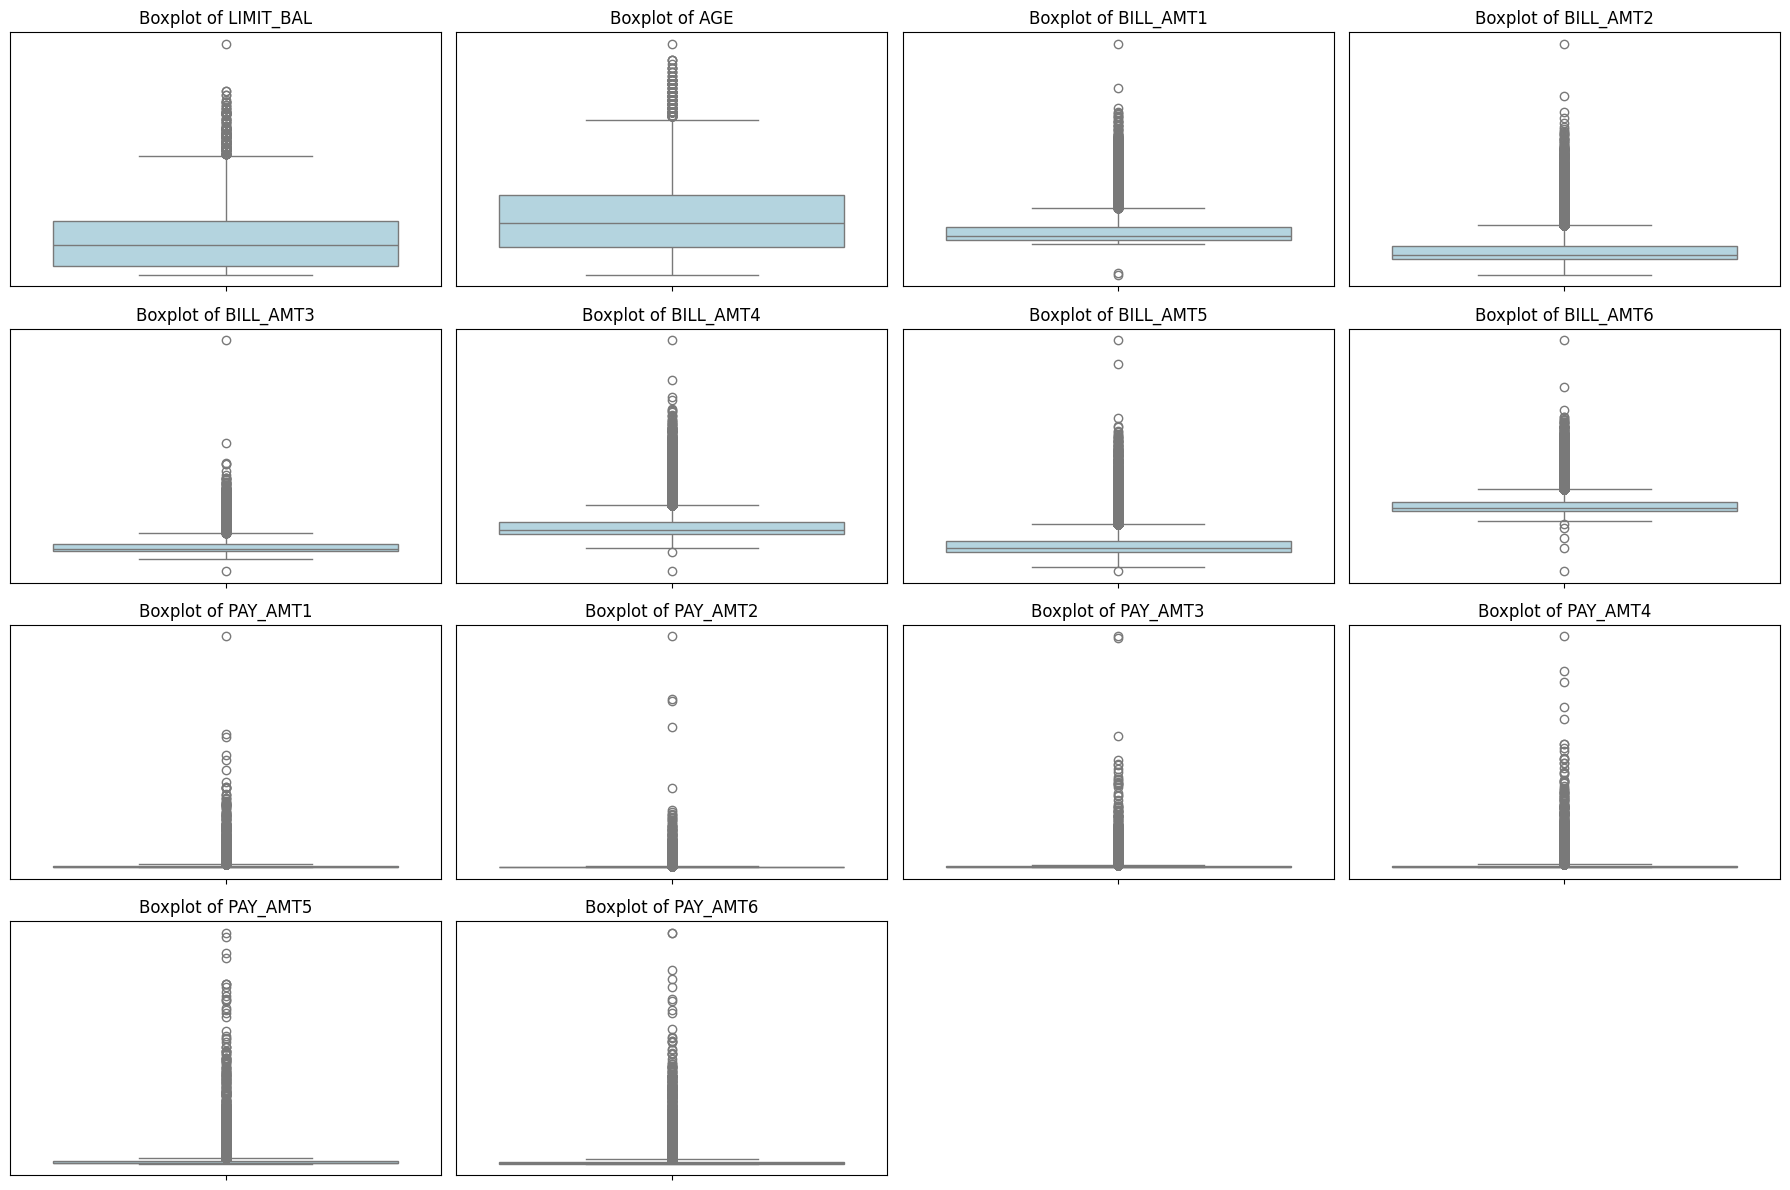

Jumlah outlier tiap kolom:
LIMIT_BAL: 167
AGE: 272
BILL_AMT1: 2400
BILL_AMT2: 2395
BILL_AMT3: 2469
BILL_AMT4: 2622
BILL_AMT5: 2725
BILL_AMT6: 2693
PAY_AMT1: 2745
PAY_AMT2: 2714
PAY_AMT3: 2598
PAY_AMT4: 2994
PAY_AMT5: 2945
PAY_AMT6: 2958


In [ ]:
# Visualisasi outlier

# Pastikan kolom numerik dalam tipe float
numerical_cols = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
# Pastikan kolom numerik bertipe float
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Hitung dan simpan jumlah outlier
outlier_counts = {}

# Visualisasi boxplot dan hitung outlier berdasarkan IQR
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    plt.yticks([])
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

    # Hitung IQR dan outlier
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_counts[col] = len(outliers)

plt.tight_layout()
plt.show()

# Tampilkan jumlah outlier
print("Jumlah outlier tiap kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

In [ ]:
# Cek missing values
df.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [ ]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(35)

In [ ]:
# Tampilkan data duplikat
duplicates = df[df.duplicated()]
duplicates

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1980,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
8320,360000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
10250,50000,1,2,2,26,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13106,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
14294,20000,1,2,2,24,2,2,4,4,4,...,1650,1650,1650,0,0,0,0,0,0,1
15458,160000,1,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Cek nilai unik / unique values
df.nunique()

,0
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11
PAY_5,10


In [ ]:
# Tampilkan nilai unik setiap fitur
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Kolom '{col}' memiliki {len(unique_vals)} nilai unik:")
    print(unique_vals)
    print("-" * 50)

Kolom 'LIMIT_BAL' memiliki 81 nilai unik:
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
--------------------------------------------------
Kolom 'SEX' memiliki 2 nilai unik:
[2 1]
--------------------------------------------------
Kolom 'EDUCATION' memiliki 7 nilai unik:
[2 1 3 5 4 6 0]
--------------------------------------------------
Kolom 'MARRIAGE' memiliki 4 nilai unik:
[1 2 3 0]

### Visualization Features

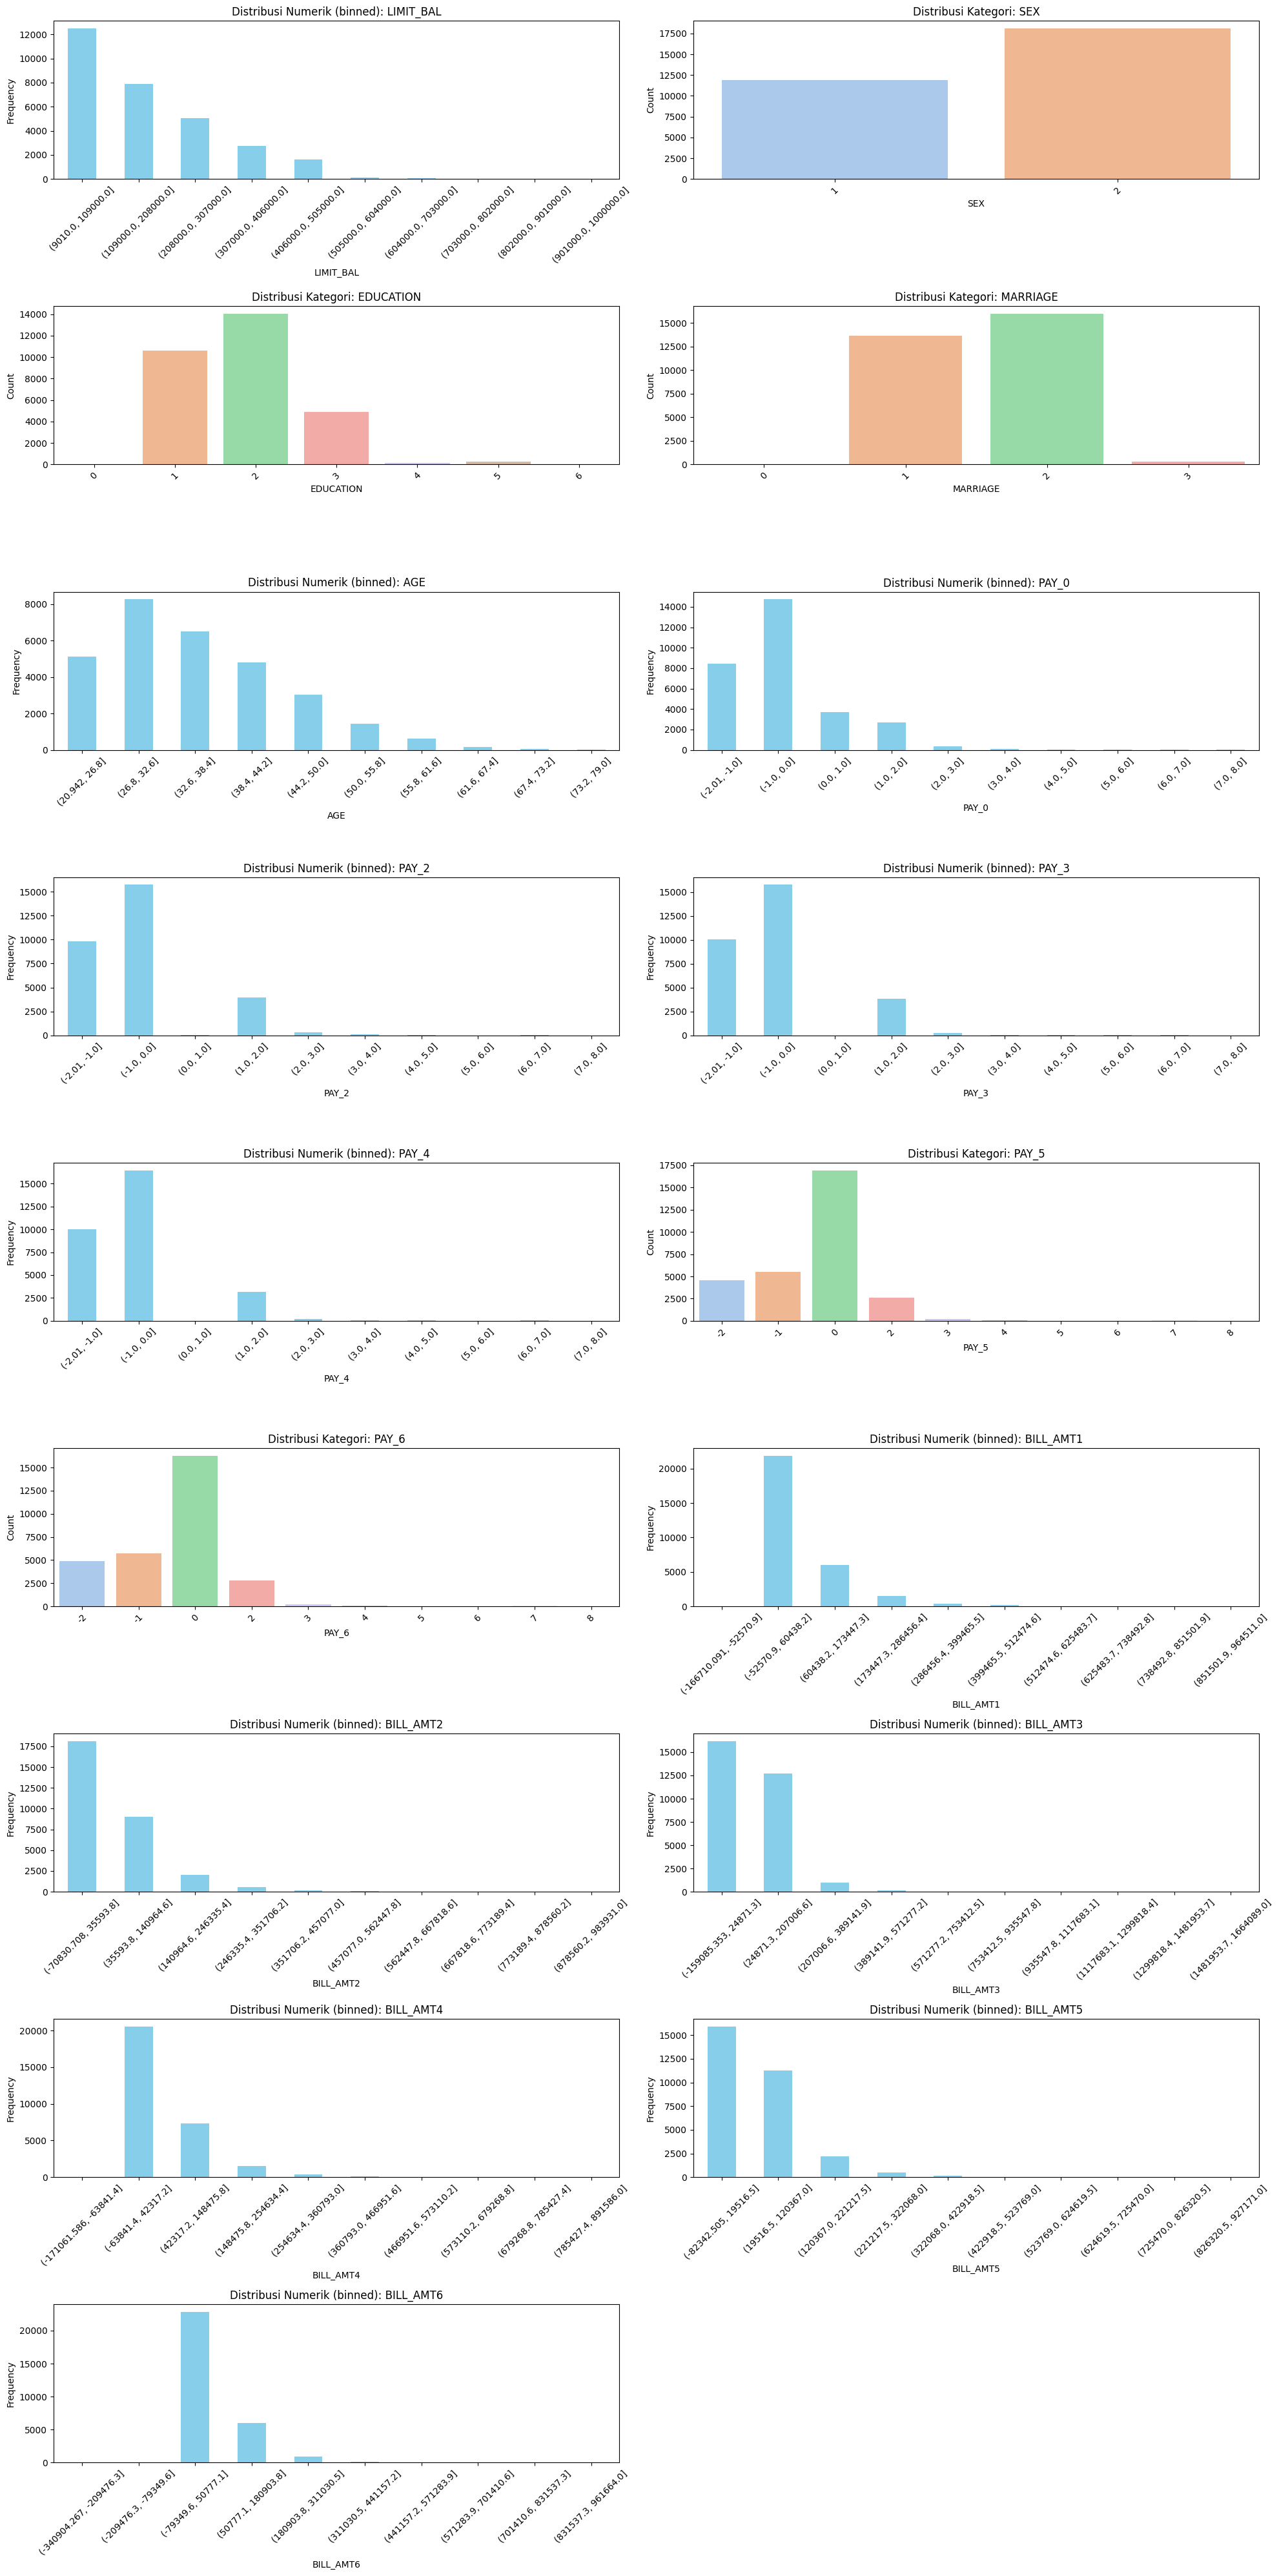

In [ ]:
# Pilih 17 fitur (selain 'Y') — bisa dipilih manual atau otomatis
selected_features = df.drop(columns='Y').columns[:17]  # ambil 17 fitur pertama

# Ukuran plot
plt.figure(figsize=(20, 40))

# Loop semua fitur untuk divisualisasikan
for i, col in enumerate(selected_features):
    plt.subplot(9, 2, i+1)  # 9 baris x 2 kolom (cukup untuk 17 fitur)

    # Cek tipe fitur: numerik atau kategorikal
    if df[col].nunique() <= 10:
        # Fitur kategorikal: plot jumlah masing-masing kategori
        sns.countplot(data=df, x=col, hue=col, palette="pastel", legend=False)
        plt.title(f'Distribusi Kategori: {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    else:
        # Fitur numerik: bin-kan dan plot distribusi
        binned = pd.cut(df[col], bins=10)
        binned_counts = binned.value_counts().sort_index()
        binned_counts.plot(kind='bar', color='skyblue')
        plt.title(f'Distribusi Numerik (binned): {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Berdasarkan jumlah nilai unik (misalnya <=15)
categorical_by_unique_values = [col for col in df.columns if df[col].nunique() <= 15 and col != 'Y']
print("Fitur kategorikal berdasarkan jumlah unique values (<=10):", categorical_by_unique_values)

Fitur kategorikal berdasarkan jumlah unique values (<=10): ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


## Preprocessing

In [ ]:
# Import Library
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

### Handling Missing Values

In [ ]:
# Ganti nilai kosong dalam bentuk string dengan NaN
df.replace([' ', '', 'NA', 'NaN', 'NULL', 'null'], np.nan, inplace=True)

In [ ]:
# Ganti semua nilai NaN dengan mean masing-masing kolom
df = df.fillna(df.mean(numeric_only=True))

In [ ]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Kolom '{col}' memiliki {len(unique_vals)} nilai unik:")
    print(unique_vals)
    print("-" * 50)

Kolom 'LIMIT_BAL' memiliki 81 nilai unik:
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
--------------------------------------------------
Kolom 'SEX' memiliki 2 nilai unik:
[2 1]
--------------------------------------------------
Kolom 'EDUCATION' memiliki 7 nilai unik:
[2 1 3 5 4 6 0]
--------------------------------------------------
Kolom 'MARRIAGE' memiliki 4 nilai unik:
[1 2 3 0]

### Handling Data Duplicates

In [ ]:
# Atasi duplikat data
df.drop_duplicates(inplace=True)

In [ ]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(0)

### Handling Outliers

In [ ]:
# Atasi outlier

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Terapkan capping langsung di df
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

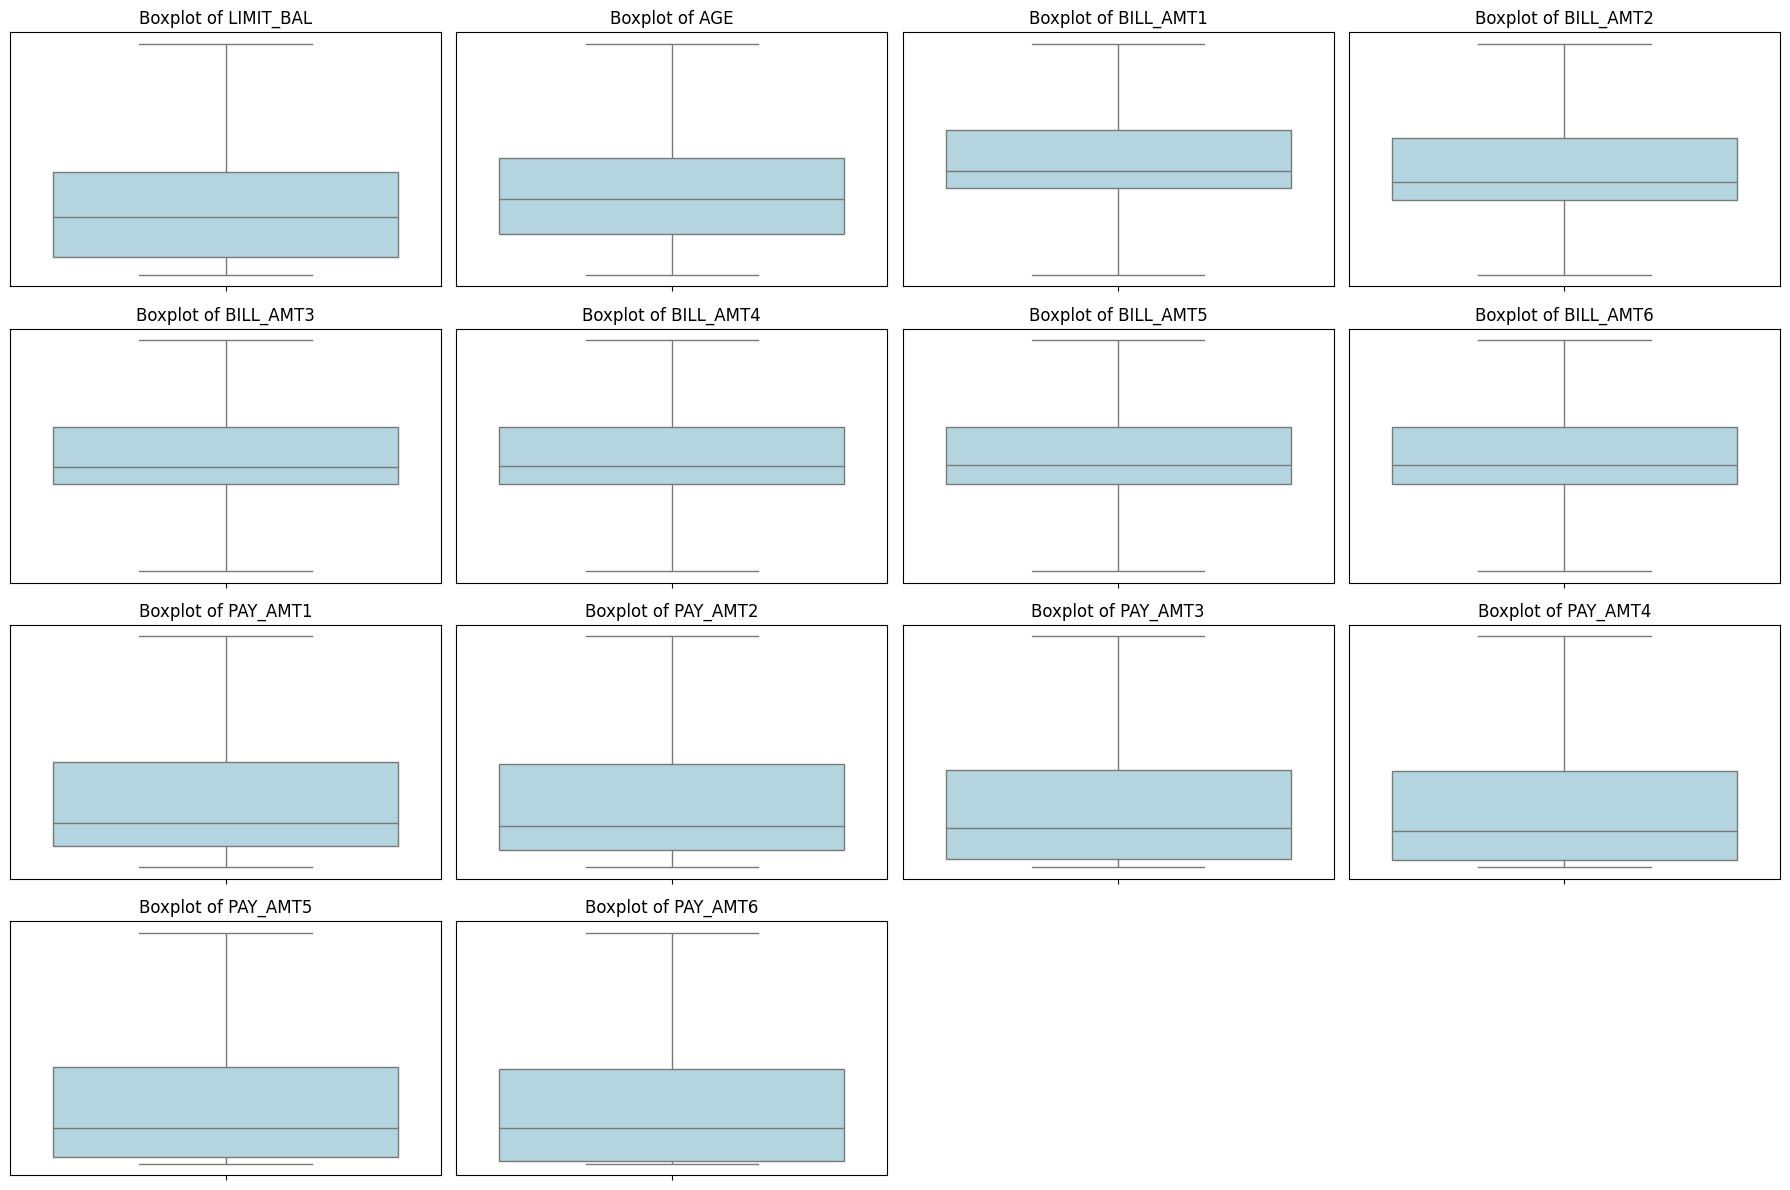

Jumlah outlier tiap kolom:
LIMIT_BAL: 0
AGE: 0
BILL_AMT1: 0
BILL_AMT2: 0
BILL_AMT3: 0
BILL_AMT4: 0
BILL_AMT5: 0
BILL_AMT6: 0
PAY_AMT1: 0
PAY_AMT2: 0
PAY_AMT3: 0
PAY_AMT4: 0
PAY_AMT5: 0
PAY_AMT6: 0


In [ ]:
# Visualisasi outlier

# Pastikan kolom numerik dalam tipe float
numerical_cols = [
    'LIMIT_BAL', 'AGE',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
# Pastikan kolom numerik bertipe float
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Hitung dan simpan jumlah outlier
outlier_counts = {}

# Visualisasi boxplot dan hitung outlier berdasarkan IQR
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    plt.yticks([])
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

    # Hitung IQR dan outlier
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_counts[col] = len(outliers)

plt.tight_layout()
plt.show()

# Tampilkan jumlah outlier
print("Jumlah outlier tiap kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

### Convert Data to Ordinal - Nominal

In [ ]:
# Fitur ordinal: LabelEncoder
ordinal_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
le = LabelEncoder()

for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])

# Fitur nominal: One Hot Encoding
nominal_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

### Check Correlations

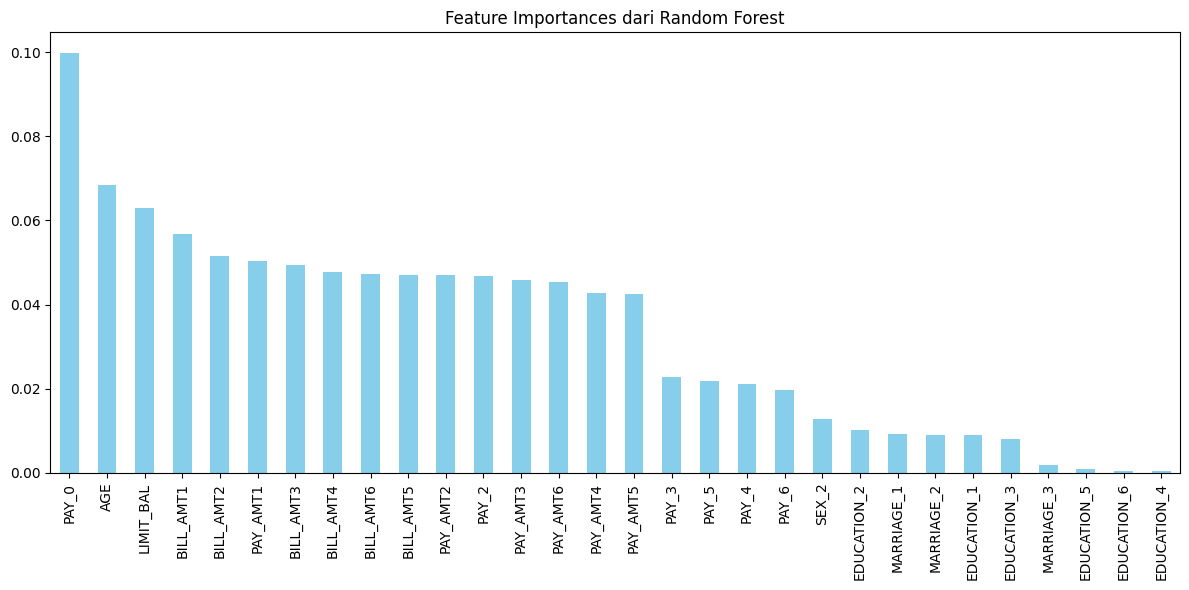


Fitur kategorikal atau one-hot yang akan dihapus seluruhnya: ['SEX', 'EDUCATION', 'MARRIAGE']

Total fitur yang dihapus: 10


In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['Y'])
y = df['Y']

# Random Forest training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Hitung feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(12, 6))
importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importances dari Random Forest')
plt.tight_layout()
plt.show()

# Threshold dan identifikasi grup fitur
threshold = 0.02
prefix_importance = defaultdict(list)

# Gabungkan OHE berdasarkan prefix-nya
for col in importances.index:
    prefix = col.split('_')[0]  # Ambil awalan kolom
    prefix_importance[prefix].append(importances[col])

# Identifikasi grup fitur OHE dengan importance rendah seluruhnya
drop_groups = [prefix for prefix, vals in prefix_importance.items() if all(val < threshold for val in vals)]

print("\nFitur kategorikal atau one-hot yang akan dihapus seluruhnya:", drop_groups)

# Drop kolom dari grup yang harus dihapus
cols_to_drop = [col for col in df.columns if any(col.startswith(prefix) for prefix in drop_groups)]
df.drop(columns=cols_to_drop, inplace=True)

print(f"\nTotal fitur yang dihapus: {len(cols_to_drop)}")

In [ ]:
# Cek data akhir
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,24.0,4,4,1,1,0,0,3913.0,3102.0,...,0.0,0,0,0,689,0,0,0.0,0.0,1
1,120000,26.0,1,4,2,2,2,3,2682.0,1725.0,...,3272.0,3455,3261,0,1000,1000,1000,0.0,2000.0,1
2,90000,34.0,2,2,2,2,2,2,29239.0,14027.0,...,14331.0,14948,15549,1518,1500,1000,1000,1000.0,5000.0,0
3,50000,37.0,2,2,2,2,2,2,46990.0,48233.0,...,28314.0,28959,29547,2000,2019,1200,1100,1069.0,1000.0,0
4,50000,57.0,1,2,1,2,2,2,8617.0,5670.0,...,20940.0,19146,19131,2000,11225,10000,9000,689.0,679.0,0


### Balancing Target SMOTE

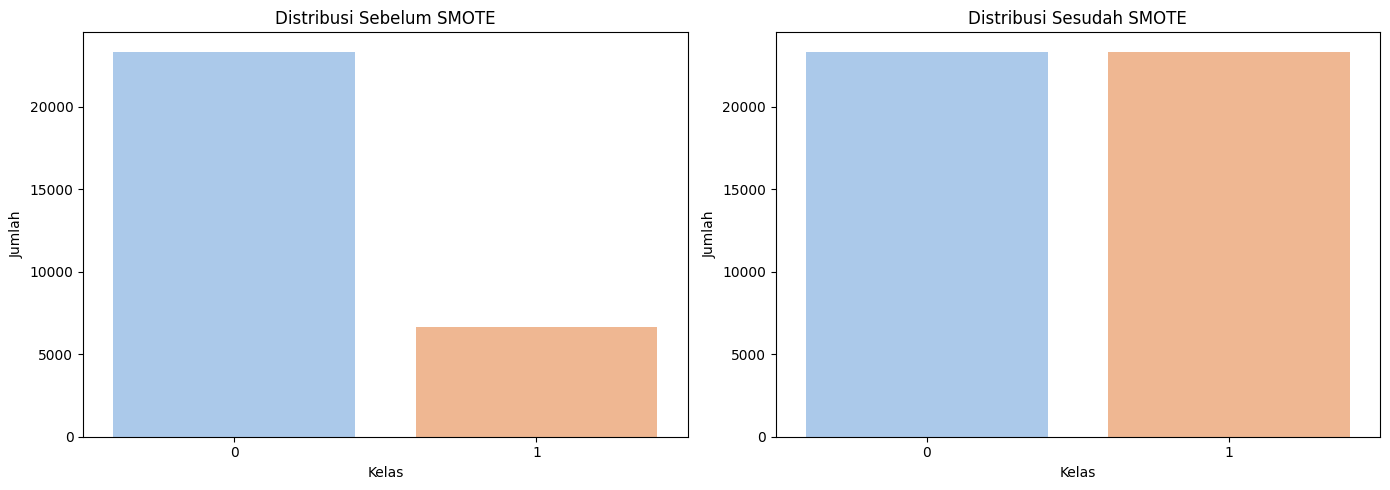

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['Y'])
y = df['Y']

# SMOTE hanya untuk data numerik - tidak perlu encode target biner
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualisasi distribusi sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sebelum SMOTE
sns.countplot(x=y, ax=axes[0], hue=y, legend=False, palette="pastel")
axes[0].set_title('Distribusi Sebelum SMOTE')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')

# Sesudah SMOTE
sns.countplot(x=y_resampled, ax=axes[1], hue=y_resampled, legend=False, palette="pastel")
axes[1].set_title('Distribusi Sesudah SMOTE')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

# Gabungkan hasil SMOTE menjadi satu dataframe baru
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Y'])

# Gabung ke satu dataframe
df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

### Scalling

In [ ]:
# Scalling dengan standarisasi
# Pisahkan fitur dan target dari df
X = df.drop(columns=['Y'])
y = df['Y']

# Inisialisasi scaler
scaler = StandardScaler()

# Terapkan scaling (hasilnya dalam numpy array)
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame dengan nama kolom asli
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Gabungkan kembali dengan target
df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Tampilkan hasil
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,-1.07343,-1.324346,1.609714,1.604594,-0.76005,-0.705494,-1.700237,-1.647820,-0.781911,-0.796982,...,-0.858275,-0.850020,-0.835377,-0.957779,-0.721788,-0.871603,-0.851400,-0.855366,-0.842224,1
1,-0.27053,-1.094906,-0.969992,1.604594,0.04320,0.098133,0.337201,1.377148,-0.806144,-0.825215,...,-0.781081,-0.762742,-0.751932,-0.957779,-0.627516,-0.553696,-0.504499,-0.855366,-0.152912,1
2,-0.51140,-0.177143,-0.110090,0.002677,0.04320,0.098133,0.337201,0.368825,-0.283366,-0.572989,...,-0.520173,-0.472411,-0.437495,-0.496286,-0.475953,-0.553696,-0.504499,-0.511233,0.881055,0
3,-0.83256,0.167017,-0.110090,0.002677,0.04320,0.098133,0.337201,0.368825,0.066065,0.128329,...,-0.190280,-0.118473,-0.079301,-0.349751,-0.318630,-0.490115,-0.469809,-0.487487,-0.497568,0
4,-0.83256,2.461423,-0.969992,0.002677,-0.76005,0.098133,0.337201,0.368825,-0.689312,-0.744331,...,-0.364251,-0.366364,-0.345835,-0.349751,2.471953,2.307468,2.270710,-0.618258,-0.608202,0


## Modelling

In [ ]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time
import joblib

Evaluasi Model

Model: Decision Tree
Training time: 1.3160 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4667
           1       0.76      0.78      0.77      4667

    accuracy                           0.77      9334
   macro avg       0.77      0.77      0.77      9334
weighted avg       0.77      0.77      0.77      9334



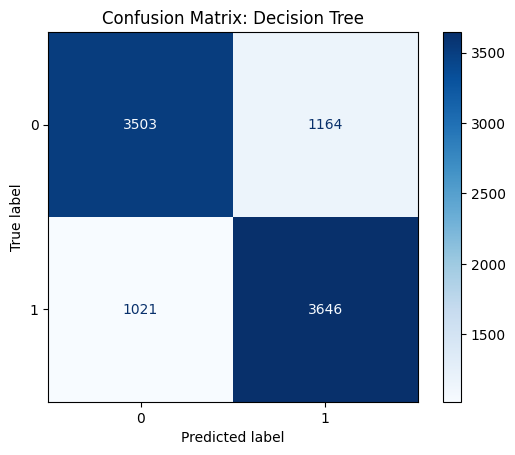


Model: KNN
Training time: 5.8135 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      4667
           1       0.74      0.80      0.77      4667

    accuracy                           0.76      9334
   macro avg       0.76      0.76      0.76      9334
weighted avg       0.76      0.76      0.76      9334



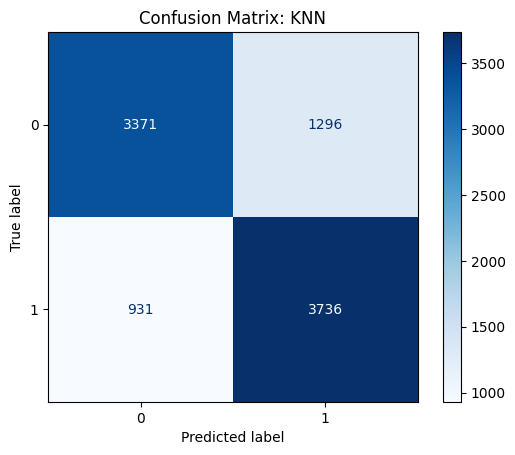


Model: Random Forest
Training time: 17.1195 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      4667
           1       0.87      0.83      0.85      4667

    accuracy                           0.85      9334
   macro avg       0.85      0.85      0.85      9334
weighted avg       0.85      0.85      0.85      9334



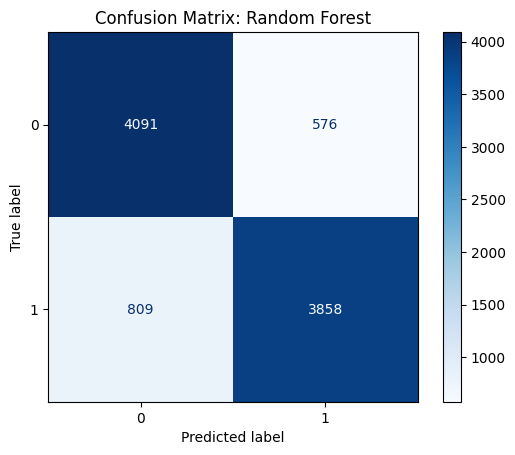


Model: SVM
Training time: 95.5916 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      4667
           1       0.74      0.67      0.71      4667

    accuracy                           0.72      9334
   macro avg       0.72      0.72      0.72      9334
weighted avg       0.72      0.72      0.72      9334



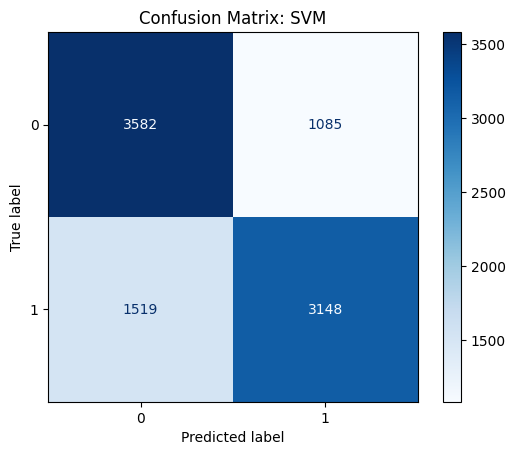


Model: Logistic Regression
Training time: 0.5711 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4667
           1       0.66      0.66      0.66      4667

    accuracy                           0.66      9334
   macro avg       0.66      0.66      0.66      9334
weighted avg       0.66      0.66      0.66      9334



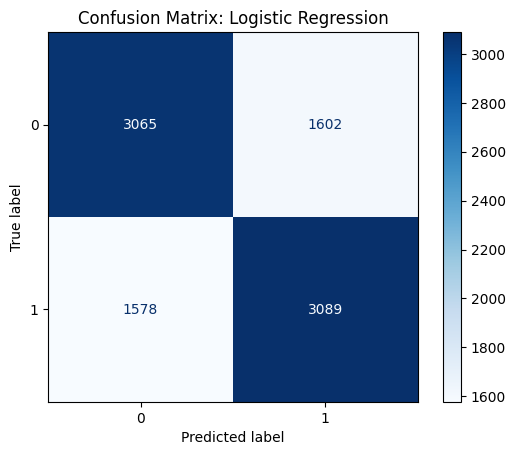


✅ Model terbaik disimpan sebagai: random_forest_best_model.pkl
Model: Random Forest | Accuracy: 0.8516


In [ ]:
# Modelling dan evaluasi
X = df.drop(columns=['Y'])
le = LabelEncoder()
y = le.fit_transform(df['Y'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Inisialisasi
results = {}
best_model = None
best_model_name = ""
best_accuracy = 0.0

print("Evaluasi Model")

for name, model in models.items():
    print(f"\nModel: {name}")

    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "training_time": training_time,
        "report": report,
        "y_pred": y_pred,
        "model": model
    }

    # Simpan jika model terbaik berdasarkan akurasi
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

    # Tampilkan hasil
    print(f"Training time: {training_time:.4f} seconds")
    print("Classification Report:")
    print(report)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.grid(False)
    plt.show()

# Simpan model terbaik berdasarkan akurasi
if best_model:
    model_filename = f"{best_model_name.lower().replace(' ', '_')}_best_model.pkl"
    joblib.dump(best_model, model_filename)
    print(f"\n✅ Model terbaik disimpan sebagai: {model_filename}")
    print(f"Model: {best_model_name} | Accuracy: {best_accuracy:.4f}")

In [ ]:
# Simpan encoder jika perlu
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
# Jika ada scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']